#Link to the Notebook:
https://colab.research.google.com/drive/1U8Dya23wPL9wD8r50EYDo8NoEN1H5J8f?usp=sharing

#Link to GitHub Repository:
https://github.com/kri-eng/CS418-Project.git

# **Any changes**:
**A discussion of whether your scope has changed since the check-in proposal slides. What did you aim to do that you will not do and what have you added to the project?**

-> Our scope has not changed since the check-in proposal slides. During the time of check-in proposal slides we were still choosing which data to take and which data not to take out of the 4 options that were mentioned in those slides. However, we have finalised our data which will be explained in the next question.

# **Data**: 

**An introduction that discusses in detail the data you are analyzing. Include where are you getting the data from and the original size of the data. Briefly describe each table and how they will be connected.**


-> We Plan to use data on natural disasters and their geography of occurrence.

URL - https://public.emdat.be/
The size of the data is about  12470 rows and  50 columns.
It has all the information about all the disaster in he world from 1990 to present and their impact, location, economic loss due to disaster, and number of people affected due to the disaster.

URL - https://corgis-edu.github.io/corgis/csv/earthquakes/
The size of the data is about 8395 rows and 18 columns.
It has all the information about an earthquake, including the impact, location, and time.




#**Problem**: 
**Describe the “big idea”? What is the problem you want to solve, the question you want to answer, or the decision-making you want to support? Why should others care about it? How did you choose this problem?**

-> Our big Idea is Natural disasters and their prediction. The problem here we want to solve is to reduce to the number of deaths that occur due to natural disaster by predicting the disaster beforehand.
As we know natural disaster account for a huge number of death count for humans all over the globe and with this project we want to figure out if there is a way in which we can predict the occurrence of this disasters so that we can increase the number of lives that can be saved by doing so.
The idea of the project came from the recent natural disasters in Turkey and Syria where a huge number of people died an untimely and horrific death.

#**Research questions**: 
**Describe the data science research questions you are investigating. At least one research question per team member. You can use this guideline to Formulate a Good Research Question For Efficient Statistical Analysis. If you use a different guideline, you must mention it and include the reference in the slide.**

-> The first data science research question that we have is: **What is the potential number of lives that can be saved by accurately predicting an earthquake before it occurs worldwide?**

-> The second data science research question that we have is: **What is the most likely latitudes and longitudes of the upcoming major earthquakes that will occur in the world?** 

#**Data cleaning**: 
**Show clearly how you cleaned your data, step by step. Show the original data size and the final size. Discuss how much data was lost after cleaning. At least one table is cleaned per team member.** 

- In the below sections we have provided all the steps that we have carried out in order to clean the data.

In [62]:
# The necessary Libraries required for the project.
import pandas as pd
import warnings
import matplotlib.pyplot as plt

# **Table 1 - Emdat Data file**

- The first step in the proceess is to read the Excel file and convert it into a pandas dataframe.

In [63]:
# Using warnigns in order to catch and not display unnecessary warnings
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    # Taking the data set and creating a pandas dataframe.
    dataframe_Em_Dat = pd.read_excel('CS418EM-Dat_data.xlsx', engine='openpyxl')

- The next few steps is to arrange the data prior to cleaning it.
- In this step we drop the header section of the file that contains information about the data that is in the file. This data is in the top four rows of the file.

In [64]:
dataframe_Em_Dat = dataframe_Em_Dat.drop(dataframe_Em_Dat.index[[0, 1, 2, 3, 4]])
dataframe_Em_Dat

,Source:,"EM-DAT, CRED / UCLouvain, Brussels, Belgium",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
5,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
6,1990-9579-CMR,1990,9579,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
7,1990-0230-ECU,1990,0230,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
8,1990-0361-AUT,1990,0361,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,...,NaN,28200,63164,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
9,1990-9059-BOL,1990,9059,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12470,2023-0080-ZAF,2023,0080,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2708;77310;77311;77312;77313;77314;77315,NaN,"Eastern Cape, Gauteng, KwaZulu-Natal, Limpopo,..."
12471,2023-0110-ZMB,2023,0110,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,65234;65235;65236,"Mazabuka, Monze, Namwala (Adm2)."
12472,2023-0068-ZMB,2023,0068,EP-2023-000013,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3428;3429;3430;3433,NaN,"Eastern, Luapula, Lusaka, Southern (Adm1)."
12473,2023-0095-ZWE,2023,0095,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Freddy',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- In this step we make the first row which contains the name for each column in to the header.

In [65]:
dataframe_Em_Dat.columns = dataframe_Em_Dat.iloc[0]
dataframe_Em_Dat

5,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
5,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
6,1990-9579-CMR,1990,9579,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
7,1990-0230-ECU,1990,0230,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
8,1990-0361-AUT,1990,0361,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,...,NaN,28200,63164,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
9,1990-9059-BOL,1990,9059,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12470,2023-0080-ZAF,2023,0080,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2708;77310;77311;77312;77313;77314;77315,NaN,"Eastern Cape, Gauteng, KwaZulu-Natal, Limpopo,..."
12471,2023-0110-ZMB,2023,0110,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,65234;65235;65236,"Mazabuka, Monze, Namwala (Adm2)."
12472,2023-0068-ZMB,2023,0068,EP-2023-000013,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3428;3429;3430;3433,NaN,"Eastern, Luapula, Lusaka, Southern (Adm1)."
12473,2023-0095-ZWE,2023,0095,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Freddy',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Here we drop the first row which is the duplication of the header and also reset the index.

In [66]:
dataframe_Em_Dat = dataframe_Em_Dat.drop(dataframe_Em_Dat.index[[0]])
dataframe_Em_dat = dataframe_Em_Dat.reset_index(drop=True)
dataframe_Em_Dat

5,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
6,1990-9579-CMR,1990,9579,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
7,1990-0230-ECU,1990,0230,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
8,1990-0361-AUT,1990,0361,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,...,NaN,28200,63164,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
9,1990-9059-BOL,1990,9059,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
10,1990-0248-AFG,1990,0248,NaN,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.645877,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12470,2023-0080-ZAF,2023,0080,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2708;77310;77311;77312;77313;77314;77315,NaN,"Eastern Cape, Gauteng, KwaZulu-Natal, Limpopo,..."
12471,2023-0110-ZMB,2023,0110,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,65234;65235;65236,"Mazabuka, Monze, Namwala (Adm2)."
12472,2023-0068-ZMB,2023,0068,EP-2023-000013,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3428;3429;3430;3433,NaN,"Eastern, Luapula, Lusaka, Southern (Adm1)."
12473,2023-0095-ZWE,2023,0095,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Freddy',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- In this steps we can see all the columns that are in the dataframe, we will not require all of them but in order to get a better understanding of the data we can see how each column is necessary to understand any disaster.

In [67]:
dataframe_Em_Dat.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object', name=5)

- Here are all the columns in the Table.
       Dis No, Year, Seq, Glide, Disaster Group, Disaster Subgroup,
       Disaster Type, Disaster Subtype, Disaster Subsubtype,
       Event Name, Country, ISO, Region, Continent, Location,
       Origin, Associated Dis, Associated Dis2, OFDA Response,
       Appeal, Declaration, AID Contribution (000 US$), Dis Mag Value,
       Dis Mag Scale, Latitude, Longitude, Local Time, River Basin,
       Start Year, Start Month, Start Day, End Year, End Month,
       End Day, Total Deaths, No Injured, No Affected, No Homeless,
       Total Affected, Reconstruction Costs (000 US$),
       Reconstruction Costs, Adjusted (000 US$),
       Insured Damages (000 US$), Insured Damages, Adjusted (000 US$),
       Total Damages (000 US$), Total Damages, Adjusted (000 US$), CPI,
       Adm Level, Admin1 Code, Admin2 Code, Geo Locations.

- In this step we will drop each column that is not required in the analysis and only keep Year, Disaster Type, Latitude, Longitude, Local Time, Total Deaths, No Injured, No Affected, No Homeless, Total Affected.

In [68]:
dataframe_Em_Dat_N = dataframe_Em_Dat[['Year', 'Disaster Type', 'Latitude', 'Longitude', 'Local Time', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected']]
dataframe_Em_Dat_N

5,Year,Disaster Type,Latitude,Longitude,Local Time,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
6,1990,Drought,NaN,NaN,NaN,NaN,NaN,186900,NaN,186900
7,1990,Earthquake,0.259 S,78.449 W,NaN,4,10,6500,NaN,6510
8,1990,Storm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1990,Drought,NaN,NaN,NaN,NaN,NaN,283160,NaN,283160
10,1990,Extreme temperature,NaN,NaN,NaN,144,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12470,2023,Flood,NaN,NaN,NaN,17,NaN,1000,NaN,1000
12471,2023,Flood,NaN,NaN,NaN,NaN,NaN,154608,NaN,154608
12472,2023,Epidemic,NaN,NaN,NaN,2,118,NaN,NaN,118
12473,2023,Storm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- In this step we will drop every row that contains a NaN value for the Total Affected, Latitude, and Longitude.

In [69]:
# In this we can see every value where there is an NaN in dataframe.
dataframe_Em_Dat_N.isna()

5,Year,Disaster Type,Latitude,Longitude,Local Time,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
6,False,False,True,True,True,True,True,False,True,False
7,False,False,False,False,True,False,False,False,True,False
8,False,False,True,True,True,True,True,True,True,True
9,False,False,True,True,True,True,True,False,True,False
10,False,False,True,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
12470,False,False,True,True,True,False,True,False,True,False
12471,False,False,True,True,True,True,True,False,True,False
12472,False,False,True,True,True,False,False,True,True,False
12473,False,False,True,True,True,True,True,True,True,True


In [70]:
dataframe_Em_Dat_N = dataframe_Em_Dat_N.dropna(subset=['Latitude','Longitude', 'Total Affected'])
dataframe_Em_Dat_N

5,Year,Disaster Type,Latitude,Longitude,Local Time,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
7,1990,Earthquake,0.259 S,78.449 W,NaN,4,10,6500,NaN,6510
52,1990,Earthquake,37.001 N,103.863 E,16:07,1,16,30000,NaN,30016
53,1990,Earthquake,35.986 N,100.245 E,NaN,126,2049,24574,7696,34319
74,1990,Earthquake,9.869 N,84.302 W,NaN,1,299,NaN,14000,14299
75,1990,Earthquake,9.919 N,84.808 W,NaN,NaN,10,300,NaN,310
...,...,...,...,...,...,...,...,...,...,...
12413,2022,Earthquake,40.847,30.967,04:08,2,93,213,NaN,306
12416,2022,Earthquake,23.119,121.422,14:44,1,140,NaN,NaN,140
12425,2022,Earthquake,40.525,124.423,02:34,2,12,NaN,NaN,12
12453,2023,Earthquake,38.055,36.51,04:17,38044,108068,16000000,NaN,16108068


- Here we will convert the string datatypes of year and totalaffected to integer data type.

In [71]:
dataframe_Em_Dat_N = dataframe_Em_Dat_N.astype({"Year":"int","Total Affected":"int"})
dataframe_Em_Dat_N

5,Year,Disaster Type,Latitude,Longitude,Local Time,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
7,1990,Earthquake,0.259 S,78.449 W,NaN,4,10,6500,NaN,6510
52,1990,Earthquake,37.001 N,103.863 E,16:07,1,16,30000,NaN,30016
53,1990,Earthquake,35.986 N,100.245 E,NaN,126,2049,24574,7696,34319
74,1990,Earthquake,9.869 N,84.302 W,NaN,1,299,NaN,14000,14299
75,1990,Earthquake,9.919 N,84.808 W,NaN,NaN,10,300,NaN,310
...,...,...,...,...,...,...,...,...,...,...
12413,2022,Earthquake,40.847,30.967,04:08,2,93,213,NaN,306
12416,2022,Earthquake,23.119,121.422,14:44,1,140,NaN,NaN,140
12425,2022,Earthquake,40.525,124.423,02:34,2,12,NaN,NaN,12
12453,2023,Earthquake,38.055,36.51,04:17,38044,108068,16000000,NaN,16108068


- Here we have completed the data cleaning for the first Table, where in we only keep the necessary rows for the analysis. As we can see that before the analysis there were about 12470 rows and 50 columns, but as we did the step by step analysis we are now at about 1950 rows and 10 columns.

# **Table 2 - earthquake.csv file**

- Here in this dataset we will start by reading the data into a pandas series.

In [72]:
df_Earthquakes = pd.read_csv('earthquakes.csv')
df_Earthquakes

,id,impact.gap,impact.magnitude,impact.significance,location.depth,location.distance,location.full,location.latitude,location.longitude,location.name,time.day,time.epoch,time.full,time.hour,time.minute,time.month,time.second,time.year
0,nc72666881,122.00,1.43,31,15.12,0.10340,"13km E of Livermore, California",37.672333,-121.619000,California,27,1469593183550,2016-07-27 00:19:43,0,19,7,43,2016
1,us20006i0y,30.00,4.90,371,97.07,1.43900,"58km WNW of Pakokku, Burma",21.514600,94.572100,Burma,27,1469593228220,2016-07-27 00:20:28,0,20,7,28,2016
2,nc72666891,249.00,0.06,0,4.39,0.02743,"12km SE of Mammoth Lakes, California",37.576500,-118.859167,California,27,1469593897150,2016-07-27 00:31:37,0,31,7,37,2016
3,nc72666896,122.00,0.40,2,1.09,0.02699,"6km SSW of Mammoth Lakes, California",37.595833,-118.994833,California,27,1469594144150,2016-07-27 00:35:44,0,35,7,44,2016
4,nn00553447,113.61,0.30,1,7.60,0.06300,"16km SSE of Mogul, Nevada",39.377500,-119.845000,Nevada,27,1469594519667,2016-07-27 00:41:59,0,41,7,59,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,nc72685246,47.00,2.42,90,4.85,0.06167,"22km ENE of Soledad, California",36.515499,-121.099831,California,25,1472181541970,2016-08-25 23:19:01,23,19,8,1,2016
8390,ak13879193,0.00,1.40,30,50.00,0.00000,"5km ESE of Big Lake, Alaska",61.498400,-149.862700,Alaska,25,1472181558000,2016-08-25 23:19:18,23,19,8,18,2016
8391,nc72685251,165.00,1.06,17,1.73,0.02042,"6km WNW of The Geysers, California",38.805000,-122.821503,California,25,1472182205600,2016-08-25 23:30:05,23,30,8,5,2016
8392,ci37672328,103.00,1.55,37,29.25,0.06980,"6km NNW of Chatsworth, CA",34.308000,-118.635333,California,25,1472182571880,2016-08-25 23:36:11,23,36,8,11,2016


- In the next step we will drop each row where we have found a NaN which will eventually be unnecessary for the data.

In [73]:
df_Earthquakes.dropna(inplace=True)
df_Earthquakes

,id,impact.gap,impact.magnitude,impact.significance,location.depth,location.distance,location.full,location.latitude,location.longitude,location.name,time.day,time.epoch,time.full,time.hour,time.minute,time.month,time.second,time.year
0,nc72666881,122.00,1.43,31,15.12,0.10340,"13km E of Livermore, California",37.672333,-121.619000,California,27,1469593183550,2016-07-27 00:19:43,0,19,7,43,2016
1,us20006i0y,30.00,4.90,371,97.07,1.43900,"58km WNW of Pakokku, Burma",21.514600,94.572100,Burma,27,1469593228220,2016-07-27 00:20:28,0,20,7,28,2016
2,nc72666891,249.00,0.06,0,4.39,0.02743,"12km SE of Mammoth Lakes, California",37.576500,-118.859167,California,27,1469593897150,2016-07-27 00:31:37,0,31,7,37,2016
3,nc72666896,122.00,0.40,2,1.09,0.02699,"6km SSW of Mammoth Lakes, California",37.595833,-118.994833,California,27,1469594144150,2016-07-27 00:35:44,0,35,7,44,2016
4,nn00553447,113.61,0.30,1,7.60,0.06300,"16km SSE of Mogul, Nevada",39.377500,-119.845000,Nevada,27,1469594519667,2016-07-27 00:41:59,0,41,7,59,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,nc72685246,47.00,2.42,90,4.85,0.06167,"22km ENE of Soledad, California",36.515499,-121.099831,California,25,1472181541970,2016-08-25 23:19:01,23,19,8,1,2016
8390,ak13879193,0.00,1.40,30,50.00,0.00000,"5km ESE of Big Lake, Alaska",61.498400,-149.862700,Alaska,25,1472181558000,2016-08-25 23:19:18,23,19,8,18,2016
8391,nc72685251,165.00,1.06,17,1.73,0.02042,"6km WNW of The Geysers, California",38.805000,-122.821503,California,25,1472182205600,2016-08-25 23:30:05,23,30,8,5,2016
8392,ci37672328,103.00,1.55,37,29.25,0.06980,"6km NNW of Chatsworth, CA",34.308000,-118.635333,California,25,1472182571880,2016-08-25 23:36:11,23,36,8,11,2016


- In the final step we will only keep columns that are necessary for the analysis, i.e. Latitude, longitude, and Time.

In [74]:
df_Earthquakes = df_Earthquakes[['location.latitude', 'location.longitude', 'time.full']]
# Using warnigns in order to catch and not display unnecessary warnings
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    df_Earthquakes['time.full'] = pd.to_datetime(df_Earthquakes['time.full'])
df_Earthquakes

,location.latitude,location.longitude,time.full
0,37.672333,-121.619000,2016-07-27 00:19:43
1,21.514600,94.572100,2016-07-27 00:20:28
2,37.576500,-118.859167,2016-07-27 00:31:37
3,37.595833,-118.994833,2016-07-27 00:35:44
4,39.377500,-119.845000,2016-07-27 00:41:59
...,...,...,...
8389,36.515499,-121.099831,2016-08-25 23:19:01
8390,61.498400,-149.862700,2016-08-25 23:19:18
8391,38.805000,-122.821503,2016-08-25 23:30:05
8392,34.308000,-118.635333,2016-08-25 23:36:11


- Here we can see that cleaning the data we have reduced the number of columns to 3 columns from a huge number of 18 columns. This 3 columns contains all the necessary information that will be required for the analysis of the problem statement and this can be done when the number of rows lost is minimal.

#**Exploratory data analysis**: 
**Explain what your data looks like (words are fine, but visualizations are often better). Include a description of each table, the statistical data type of each column, the number of rows, etc. All the columns should be analyzed. You should try to find correlations between the different attributes. Include any interesting issues or preliminary conclusions you have about your data. All the tables should be analyzed. Please include the author of the EDA per table, at least one EDA per team member.**


-> **Author: Krish Patel - Table 1**
- After achieveing the final state of cleaning the data the table 1 which contains the EmDat data for natural disaster only contains the information that is absolutely necesary for carrying the analysis required for the problem statement. This Data contains 1950 rows and 10 columns. Every column when analyzed with the help of .dtype we can see that each column contains object as the datatype. In this table we can see a correlation between latiude and longitude as they describe the geographic location of the natural disaster, apart from this the columns describing the number of people died, homeless, affected and injured are also correlated as they describe the total number of people that were affected due to the natural disaster which will be crucial in order to predict the number of that deaths that will occur due o a natural diasater like Earthquake.


In [75]:
# Here we can see the dtypes of each and every column in the dataframe.
dataframe_Em_Dat_N.dtypes

5
Year               int64
Disaster Type     object
Latitude          object
Longitude         object
Local Time        object
Total Deaths      object
No Injured        object
No Affected       object
No Homeless       object
Total Affected     int64
dtype: object

-> **Author: Panth Patel - Table 2** 
- After cleaning the data and keeping only the columns that are required to predict the most likely latitudes and longitudes of the upcoming major earthquakes that will occur in the world, there are 3 columns with 8394 rows each. The columns latitude and longitude are of float data type and the time.full column is of datetime datatype. The columns latitude and longitude are correlated to each other as they give the location of the earthquake and time column gives the exact date and time of that particular earthquake. The date and time column goes from 27 July 2016 to 25 August 2016.An interesting issue which I see is that this table is for a ceratin period and cannot really say if the predictions would be accurate or not.

In [76]:
# Here we can see the dtypes of each and every column in the dataframe.
df_Earthquakes.dtypes

location.latitude            float64
location.longitude           float64
time.full             datetime64[ns]
dtype: object

#**Visualizations for EDA**: 
**That test an interesting hypothesis, along with an explanation about why you thought this was an interesting hypothesis to investigate. At least one visualization per team member.**

-> **Panth Patel - Table 2** 
- One interesting hypothesis to investigate based on the given EDA would be to check if there is a relationship between the latitude/longitude of the earthquake epicenters and the time of day when they occur. This scatter plot will show if there is any trend or pattern in the occurrence of earthquakes based on the time of day. If there is a noticeable pattern, it could suggest that certain times of day are more likely to have earthquakes and could be useful for predicting upcoming earthquakes. If there is no pattern, it could suggest that the time of day is not a useful predictor for earthquake occurrence.

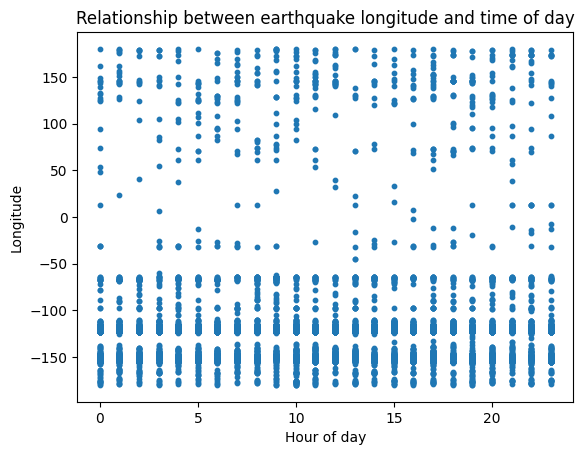

In [77]:
# Using warnigns in order to catch and not display unnecessary warnings
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    df_Earthquakes['hour'] = df_Earthquakes['time.full'].dt.hour
plt.scatter(df_Earthquakes['hour'], df_Earthquakes['location.longitude'], s=10)
plt.xlabel('Hour of day')
plt.ylabel('Longitude')
plt.title('Relationship between earthquake longitude and time of day')
plt.show()

-> **Krish Patel - Table 1**
- Here we cann see that the hypithesis that will tend to be an interesting one would be, The frequency and severity of natural disasters have increased over time, resulting in a higher number of people affected each year. Now as we can see in the below graph that the number of deaths ten to be more in the years between 2010 and 2015 and decreases between 2015 to 2020. In this two senerios we can see from the visualization that the hypothesis is false and hence the visualization of total affected vs the year tend to be a useful tool in explaining this.

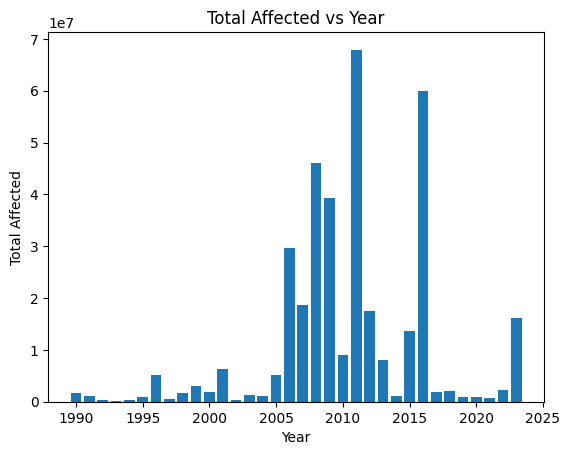

In [78]:
# Create a bar plot of Total Affected vs Year
plt.bar(dataframe_Em_Dat_N['Year'], dataframe_Em_Dat_N['Total Affected'])

# Set the title and axes labels
plt.title('Total Affected vs Year')
plt.xlabel('Year')
plt.ylabel('Total Affected')

# Show the plot
plt.show()

#**Model planning**: 
**Write down the ML models that you plan to use to answer the DS research questions and explain why these models make sense. For each question, propose at least three ML models and analyze their pros and cons. At least three models are proposed per team member.  
Source: https://sherbold.github.io/intro-to-data-science**

**For the research question : What is the potential number of lives that can be saved by accurately predicting an earthquake before it occurs worldwide?**

Following are the 3 ML models we propose.

- K-Nearest Neighbor Clustering - KNN clustering can be used to put data points into groups based on similarities. We could use it to find groups of prior earthquakes that have shared locations and fatality counts in the context of earthquake prediction. Based on the location of future earthquakes, this information can be used by us to estimate how many people will die in each one. One pro of KNN clustering is that it is straightforward, understandable approach that can handle high-dimensional data. One con is that it may not be efficient if the underlying data has a complicated structure, and the number of clusters chosen can be arbitrary.

- Linear Regression - Linear regression may be used to simulate the connection between a dependent variable and one or more independent variables. We can model the association between the location of earthquakes and the quantity of fatalities using linear regression for death prediction. We can use the model once it has been trained on past earthquake data. One pro of linear regression is that it can handle both continuous and categorical independent variables and is a straightforward and understandable model. One con is that it relies on the independent and dependent variables having a linear connection, hence it may not work well when there is a non-linear relationship.

- Association Rule Mining - Association rule mining can be used to find patterns in data. We can use it to identify rules that describe the relationship between the location of earthquakes and the number of deaths. We can use these rules to predict the number of deaths in future earthquakes based on their location. One pro of association rule mining is that it can identify complex relationships between variables, and can handle both continuous and categorical data. One con is that it can be sensitive to noise in the data, and may generate a large number of rules that are difficult to interpret.

**For the research question : What is the most likely latitudes and longitudes of the upcoming major earthquakes that will occur in the world?**

Following are the 3 ML models we propose.

- ARMA - ARMA is a time series analysis technique that we can use to model and predict future values based on historical data. That is exactly what we are planning to do using the past earthquake data and predicting the future earthquake locations. One pro of ARMA is its ability to handle time series data and predict future values based on historical patterns. One con is that it assumes that the time series data is stationary, which may not be the case for all earthquake data. Another con is that it is not well-suited for handling non-linear relationships between the features and target variable.

- K-Means Clustering - We can use K-means to group earthquakes based on their location. One pro of K-Means clustering is that we can use it to identify natural groupings in the data without requiring prior knowledge of the labels. Which is also useful for identifying locations(latitude,longitude) that are more prone to earthquakes. One con is that it is sensitive to the choice of K value, which may not be known in advance.

- Random Forest Classification - We could use Random Forest for both classification and regression tasks. We can use it to predict the occurrence of an earthquake in a particular location based on historical earthquake data. One pro of Random Forest Classification is its ability to handle non-linear relationships between the features and target variable. One con is that it can be prone to overfitting if the number of trees is too large or if the trees are too deep.

#**Reflection**: 
**A discussion of the following:
What is the hardest part of the project that you’ve encountered so far?
What are your initial insights?
Are there any concrete results you can show at this point? If not, why not?
Going forward, what are the current biggest problems you’re facing?
Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
Given your initial exploration of the data, is it worth proceeding with your project, and why? If not, how are you going to change your project and why do you think it’s better than your current results?**

- One of the most hardest part that we have encountered so far was to find the data set that we where going to use, as this would be a crucial part that would shape the rest of the project.

- The concerete results that we can show right now is the process that go into data cleaning, for results regarding the prediction we have not yet embarked on the step to analyze the data using an EDA, due to which we cannot show results regarding prediction.

- The current biggest problem that we are facing is determining the EDA that we will use in the project for each team member as this will not only gives us a prediction but which EDA gives the best quality of prediction will be crucial.

- As of right now, it would not harm to assume that we are on track with the project.

- As per the intial explorations of the data we do find it worth to proceed with the project, as we can see a connection that can be esatblished with both the datasets which can overall help us in solving the problems and reducing the number of deaths that occur due to an Earthquake.

#**Next steps**: 
**What do you plan to accomplish in the next month and how do you plan to evaluate whether your project achieved the goals you set for it?**

- In the upcoming months we can see ourselves working on analyzing the data using one of the above EDA methods. After taht we will see if the findings from both the datasets match the research question that we have set for ourselves and once we are successfull in doing so we can say that we have achieved the goal for the project.

#**References**: 
**List all the resources we have used.**

- https://sherbold.github.io/intro-to-data-science

- https://regenerativetoday.com/learn-to-formulate-good-research-question-for-efficient-statistical-analysis/


- https://corgis-edu.github.io/corgis/csv/earthquakes/

- https://public.emdat.be/

- https://medium.com/analytics-vidhya/ml-algorithms-pros-cons-and-suitable-usages-b377c3c09f1b



